[1.763656735420227, 1.721005916595459, 1.6806014776229858, 1.6423187255859375, 1.606040358543396, 1.5716561079025269, 1.5390616655349731, 1.5081586837768555, 1.478854775428772, 1.4510629177093506, 1.424700379371643, 1.39969003200531, 1.3759582042694092, 1.35343599319458, 1.3320584297180176, 1.3117640018463135, 1.292494773864746, 1.274195909500122, 1.2568155527114868, 1.2403055429458618, 1.2246191501617432, 1.209713101387024, 1.1955466270446777, 1.1820802688598633, 1.1692780256271362, 1.1571048498153687, 1.1455283164978027, 1.1345171928405762, 1.1240421533584595, 1.1140758991241455, 1.104592204093933, 1.0955662727355957, 1.0869743824005127, 1.078795075416565, 1.0710068941116333, 1.0635900497436523, 1.0565261840820312, 1.0497970581054688, 1.0433859825134277, 1.0372772216796875, 1.0314557552337646, 1.0259071588516235, 1.0206177234649658, 1.0155746936798096, 1.0107661485671997, 1.0061802864074707, 1.0018067359924316, 0.9976344704627991, 0.9936540126800537, 0.989855945110321, 0.986231505870

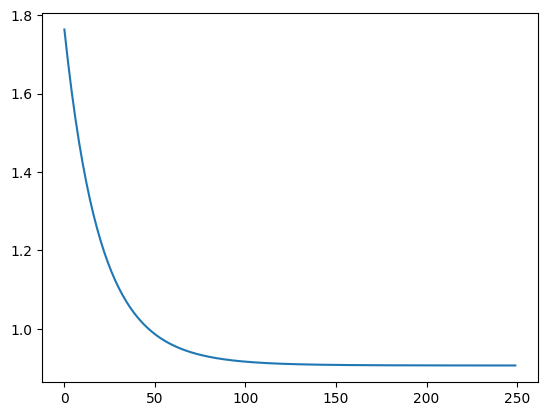

tensor([[68892.3359],
        [69928.7500],
        [64599.7422]], grad_fn=<AddBackward0>)


In [2]:
import sys
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

# Pandas: Reading the data
df = pd.read_csv("../starter/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()

model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Use a higher learning rate (0.01)

losses = []  # Initialize a list called `losses = []` before training
# Train for 250 iterations, appending loss.item() to `losses` each iteration
for i in range(0, 250):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    # if i % 100 == 0:
    #    print(loss.item())
    # if i % 100 == 0:
    #    print(model.bias)
    #    print(model.weight)

# Print the losses list
print(losses)
# Plot the losses with plt.plot(losses) and show with plt.show()
plt.plot(losses)
plt.show()

X_data = torch.tensor([
    [5, 10000],
    [2, 10000],
    [5, 20000]
], dtype=torch.float32)

prediction = model((X_data - X_mean) / X_std)
print(prediction * y_std + y_mean)